In [1]:
import cem_mini
import cem_mini.cem_examples as cem_examples

# basic examples

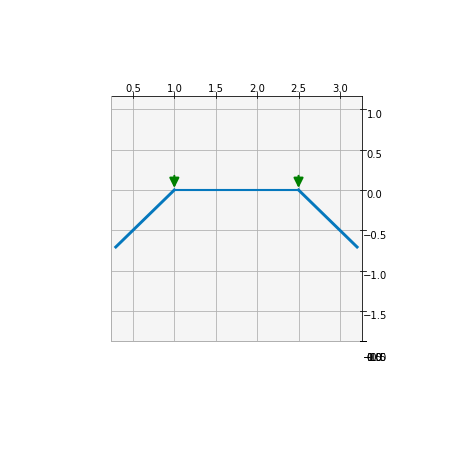

In [2]:
cem_examples.quick_start_2d();

iteration 7 error 8.583734e-09 finished.


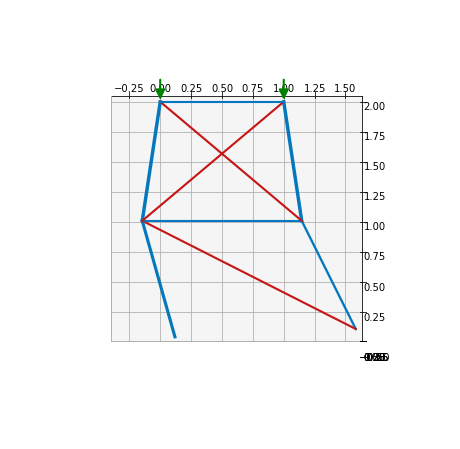

In [3]:
cem_examples.braced_tower_2d();

iteration 3 error 0.0 finished.


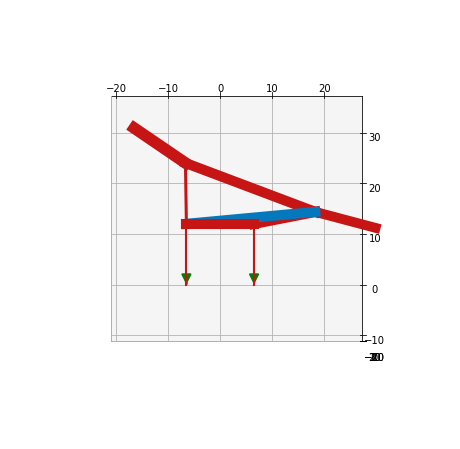

In [4]:
cem_examples.bridge_2d();

# specifying topology via trail edges instead of trail path

In [5]:
import numpy as np

trail_edges = [[2,3],[3,0],[0,1],[6,7],[7,4],[4,5]]

# trail edges are non-directional
trail_edges = np.asarray([e if np.random.random()>0.5 else e[::-1] for e in trail_edges])

# shuffling the edges to simulate specifying trail edges in a random order
np.random.shuffle(trail_edges)

# as all trail lengths are the same, we ignore the shuffling process
trail_lengths = [12,12,12,12,12,12]

original_nodes = [2, 6]
support_nodes = [1, 5]

trail_edges

array([[4, 5],
       [6, 7],
       [2, 3],
       [3, 0],
       [0, 1],
       [4, 7]])

iteration 3 error 0.0 finished.


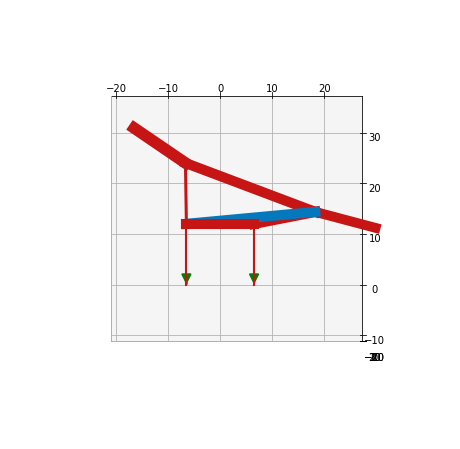

In [6]:
T=cem_mini.create_topology(8)

# specify topology via support nodes
cem_mini.set_trail_edges(T, trail_edges, trail_lengths, support_nodes=support_nodes)
cem_mini.set_deviation_edges(T,[[7,3],[3,4],[0,4]],[5,-5,5])

cem_mini.set_original_node_positions(T,{2:[-6.5,0,0], 6:[6.5,0,0]})
cem_mini.set_node_loads(T,{2:[0,-1,0],6:[0,-1,0]})

# solve the CEM
F, Fc= cem_mini.CEM(T,1e-7)

cem_examples._make_plots(F)

iteration 3 error 0.0 finished.


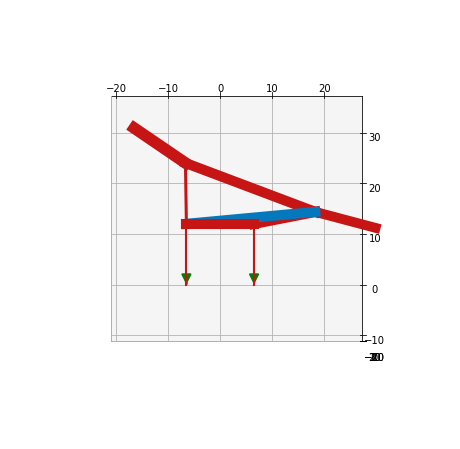

In [7]:
T=cem_mini.create_topology(8)

# specify topology via original nodes
cem_mini.set_trail_edges(T, trail_edges, trail_lengths, original_nodes=original_nodes)
cem_mini.set_deviation_edges(T,[[7,3],[3,4],[0,4]],[5,-5,5])

cem_mini.set_original_node_positions(T,{2:[-6.5,0,0], 6:[6.5,0,0]})
cem_mini.set_node_loads(T,{2:[0,-1,0],6:[0,-1,0]})

# solve the CEM
F, Fc= cem_mini.CEM(T,1e-7)

cem_examples._make_plots(F)

# topology with unused nodes

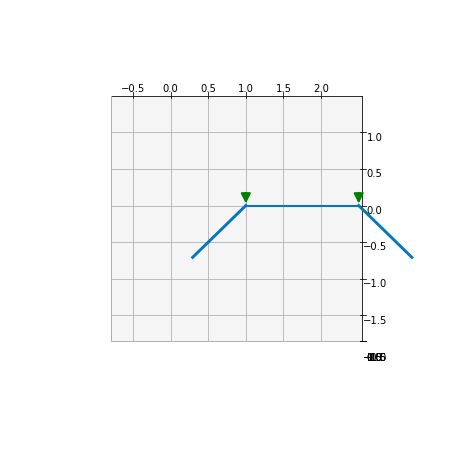

In [8]:
T=cem_mini.create_topology(8)

cem_mini.set_trail_edges(T, [[1,0],[6,7]],[-1,-1], original_nodes=[1,6])
cem_mini.set_deviation_edges(T,[[1,6]],[-1])

cem_mini.set_original_node_positions(T,{1:[1,0,0], 6:[2.5,0,0]})
cem_mini.set_node_loads(T,{1:[0,-1,0],6:[0,-1,0]})

# solve the CEM
F, Fc= cem_mini.CEM(T,1e-6)

cem_examples._make_plots(F)

# topology of uneuqal trail path lengths

iteration 5 error 7.484724e-11 finished.


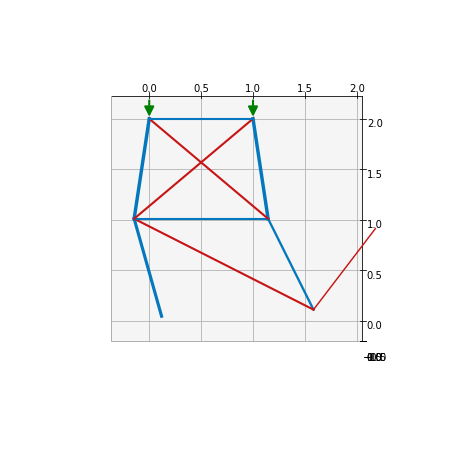

In [9]:
# topology
T=cem_mini.create_topology(7)

# two trail paths that have 3 and 4 nodes
cem_mini.set_trail_paths(T, [[2,1,0],[5,4,3,6]],[[-1,-1],[-1,-1, 1]])
cem_mini.set_deviation_edges(T,[[1,4],[2,5],[1,5],[1,3],[2,4]],[-1,-1, 1, 1, 1])

cem_mini.set_original_node_positions(T,{2:[0,2,0], 5:[1,2,0]})
cem_mini.set_node_loads(T,{2:[0,-1,0],5:[0,-1,0]})

# solve the CEM
F, Fc= cem_mini.CEM(T,1e-7)

cem_examples._make_plots(F)

# other examples

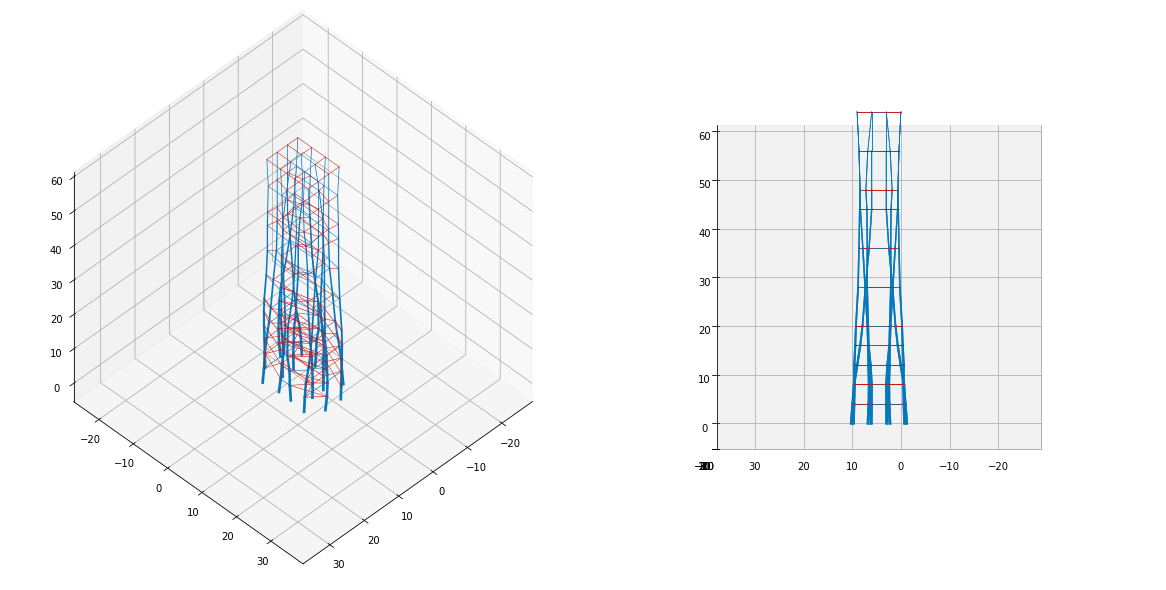

In [9]:
cem_examples.random_tower(4,4,12);